## PART 1

In [55]:
import numpy as np
import matplotlib.pyplot as plt

import os
import cv2
import moviepy.editor as mpy

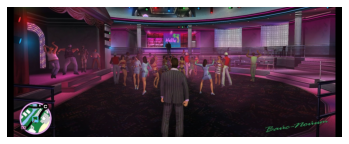

In [56]:
background = cv2.imread("Malibu.jpg")
plt.axis("off")
plt.imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))
plt.show()

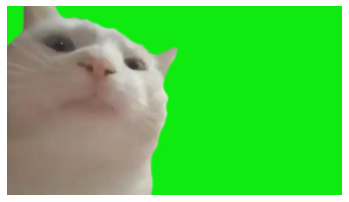

In [57]:
cat_0 = cv2.imread("cat/cat_0.png")
plt.axis("off")
plt.imshow(cv2.cvtColor(cat_0, cv2.COLOR_BGR2RGB))
plt.show()

In [58]:
background_height = background.shape[0]
background_width = background.shape[1]
cat_height = cat_0.shape[0]
ratio = cat_height/background_height

background = cv2.resize(background, (int(background_width*ratio), cat_height))

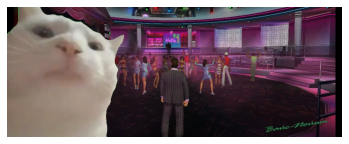

In [59]:
cat_0_green = cat_0[:,:,1]
cat_0_red = cat_0[:,:,0]

foreground = np.logical_or(cat_0_green < 180, cat_0_red > 150)
nonzero_x, nonzero_y = np.nonzero(foreground)
nonzero_cat = cat_0[nonzero_x, nonzero_y, :]

new_frame = background.copy()
new_frame[nonzero_x, nonzero_y, :] = nonzero_cat

plt.axis("off")
plt.imshow(cv2.cvtColor(new_frame, cv2.COLOR_BGR2RGB))
plt.show()

Human sorting algorithm below is adopted from
https://nedbatchelder.com/blog/200712/human_sorting.html

In [60]:
import re
def atoi(text):
    return int(text) if text.isdigit() else text
def natural_keys(text):
    return [atoi(c) for c in re.split(r'(\d+)', text)]

In [61]:
path = "cat"
cat_frames = [os.path.join(path, f) for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
cat_frames.sort(key=natural_keys)

In [62]:
new_cat_frames = []

for frame in cat_frames:
    cat = cv2.imread(frame)
    cat_green = cat[:,:,1]
    cat_red = cat[:,:,0]

    foreground = np.logical_or(cat_green < 180, cat_red > 150)
    nonzero_x, nonzero_y = np.nonzero(foreground)
    nonzero_cat = cat[nonzero_x, nonzero_y, :]

    new_frame = background.copy()
    new_frame[nonzero_x, nonzero_y, :] = nonzero_cat
    new_frame = cv2.cvtColor(new_frame, cv2.COLOR_BGR2RGB)
    new_cat_frames.append(new_frame)

In [63]:
clip = mpy.ImageSequenceClip(new_cat_frames, fps=25)
audio = mpy.AudioFileClip("selfcontrol_part.wav").set_duration(clip.duration)
clip = clip.set_audio(audioclip=audio)
clip.write_videofile("part1_video.mp4", codec="libx264")

chunk:  44%|████▍     | 70/159 [00:00<00:00, 698.26it/s, now=None]

Moviepy - Building video part1_video.mp4.
MoviePy - Writing audio in part1_videoTEMP_MPY_wvf_snd.mp3


t:  24%|██▍       | 44/181 [00:00<00:00, 431.46it/s, now=None]     

MoviePy - Done.
Moviepy - Writing video part1_video.mp4



Moviepy - Done !
Moviepy - video ready part1_video.mp4


## PART 2

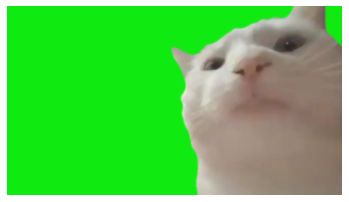

In [64]:
cat_0_mirrored = np.flip(cat_0, 1)
plt.axis("off")
plt.imshow(cv2.cvtColor(cat_0_mirrored, cv2.COLOR_BGR2RGB))
plt.show()

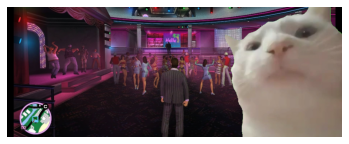

In [65]:
cat_0_mirrored_green = cat_0_mirrored[:,:,1]
cat_0_mirrored_red = cat_0_mirrored[:,:,0]
horizontal_shift = background.shape[1] - cat_0_mirrored.shape[1]

foreground = np.logical_or(cat_0_mirrored_green < 180, cat_0_mirrored_red > 150)
nonzero_x, nonzero_y = np.nonzero(foreground)
nonzero_cat = cat_0_mirrored[nonzero_x, nonzero_y, :]

new_frame = background.copy()
new_frame[nonzero_x, nonzero_y + horizontal_shift, :] = nonzero_cat

plt.axis("off")
plt.imshow(cv2.cvtColor(new_frame, cv2.COLOR_BGR2RGB))
plt.show()

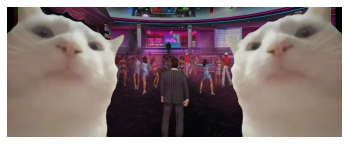

In [66]:
foreground = np.logical_or(cat_0_green < 180, cat_0_red > 150)
foreground_mirrored = np.logical_or(cat_0_mirrored_green < 180, cat_0_mirrored_red > 150)
nonzero_x, nonzero_y = np.nonzero(foreground)
nz_x_mirrored, nz_y_mirrored = np.nonzero(foreground_mirrored)
nonzero_cat = cat_0[nonzero_x, nonzero_y, :]
nz_cat_mirrored = cat_0_mirrored[nz_x_mirrored, nz_y_mirrored, :]

new_frame = background.copy()
new_frame[nonzero_x, nonzero_y, :] = nonzero_cat
new_frame[nz_x_mirrored, nz_y_mirrored + horizontal_shift, :] = nz_cat_mirrored

plt.axis("off")
plt.imshow(cv2.cvtColor(new_frame, cv2.COLOR_BGR2RGB))
plt.show()

In [67]:
new_cat_frames = []

for frame in cat_frames:
    cat = cv2.imread(frame)
    cat_mir = np.flip(cat, 1)
    new_frame = background.copy()
    
    fg = np.logical_or(cat[:,:,1] < 180, cat[:,:,0] > 150)
    fg_mir = np.logical_or(cat_mir[:,:,1] < 180, cat_mir[:,:,0] > 150)
    
    nz_x, nz_y = np.nonzero(fg)
    nz_cat = cat[nz_x, nz_y, :]
    new_frame[nz_x, nz_y, :] = nz_cat
    
    nz_x, nz_y = np.nonzero(fg_mir)
    nz_cat_mir = cat_mir[nz_x, nz_y, :]
    new_frame[nz_x, nz_y + horizontal_shift, :] = nz_cat_mir
    
    new_frame = cv2.cvtColor(new_frame, cv2.COLOR_BGR2RGB)
    new_cat_frames.append(new_frame)

In [68]:
clip = mpy.ImageSequenceClip(new_cat_frames, fps=25)
audio = mpy.AudioFileClip("selfcontrol_part.wav").set_duration(clip.duration)
clip = clip.set_audio(audioclip=audio)
clip.write_videofile("part2_video.mp4", codec="libx264")

chunk:  35%|███▌      | 56/159 [00:00<00:00, 558.18it/s, now=None]

Moviepy - Building video part2_video.mp4.
MoviePy - Writing audio in part2_videoTEMP_MPY_wvf_snd.mp3


t:  23%|██▎       | 41/181 [00:00<00:00, 401.97it/s, now=None]     

MoviePy - Done.
Moviepy - Writing video part2_video.mp4



Moviepy - Done !
Moviepy - video ready part2_video.mp4


## PART 3

In [79]:
def change_brightness(image, brightness=0):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV).astype("int16")
    hsv[:,:,2] += brightness
    hsv[:,:,2] = hsv[:,:,2].clip(min=0, max=255)
    return cv2.cvtColor(hsv.astype("uint8"), cv2.COLOR_HSV2BGR)

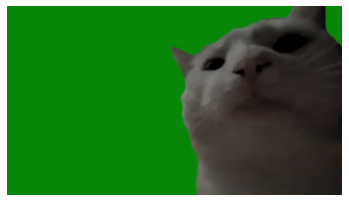

In [80]:
brightness = -100

cat_0_dark = np.flip(cat_0, 1)
cat_0_dark_green = cat_0_dark[:,:,1]
cat_0_dark_red = cat_0_dark[:,:,0]
horizontal_shift = background.shape[1] - cat_0_dark.shape[1]

foreground_dark = np.logical_or(cat_0_dark_green < 180, cat_0_dark_red > 150)
nz_x_dark, nz_y_dark = np.nonzero(foreground_dark)

cat_dark = change_brightness(cat_0_dark, brightness)

nz_cat_dark = cat_dark[nz_x_dark, nz_y_dark, :]

plt.axis("off")
plt.imshow(cv2.cvtColor(cat_dark, cv2.COLOR_BGR2RGB))
plt.show()

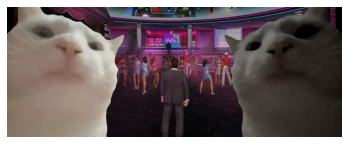

In [74]:
new_frame = background.copy()
new_frame[nonzero_x, nonzero_y, :] = nonzero_cat
new_frame[nz_x_dark, nz_y_dark + horizontal_shift, :] = nz_cat_dark

plt.axis("off")
plt.imshow(cv2.cvtColor(new_frame, cv2.COLOR_BGR2RGB))
plt.show()

In [81]:
new_cat_frames = []
brightness = -100

for frame in cat_frames:
    cat = cv2.imread(frame)
    cat_dark = np.flip(cat, 1)
    new_frame = background.copy()
    
    fg = np.logical_or(cat[:,:,1] < 180, cat[:,:,0] > 150)
    fg_dark = np.logical_or(cat_dark[:,:,1] < 180, cat_dark[:,:,0] > 150)
    
    nz_x, nz_y = np.nonzero(fg)
    nz_cat = cat[nz_x, nz_y, :]
    new_frame[nz_x, nz_y, :] = nz_cat
    
    cat_dark = change_brightness(cat_dark, brightness)
    nz_x, nz_y = np.nonzero(fg_dark)
    nz_cat_dark = cat_dark[nz_x, nz_y, :]
    new_frame[nz_x, nz_y + horizontal_shift, :] = nz_cat_dark
    
    new_frame = cv2.cvtColor(new_frame, cv2.COLOR_BGR2RGB)
    new_cat_frames.append(new_frame)

In [82]:
clip = mpy.ImageSequenceClip(new_cat_frames, fps=25)
audio = mpy.AudioFileClip("selfcontrol_part.wav").set_duration(clip.duration)
clip = clip.set_audio(audioclip=audio)
clip.write_videofile("part3_video.mp4", codec="libx264")

chunk:  44%|████▍     | 70/159 [00:00<00:00, 698.31it/s, now=None]

Moviepy - Building video part3_video.mp4.
MoviePy - Writing audio in part3_videoTEMP_MPY_wvf_snd.mp3


t:  24%|██▍       | 44/181 [00:00<00:00, 431.49it/s, now=None]     

MoviePy - Done.
Moviepy - Writing video part3_video.mp4



Moviepy - Done !
Moviepy - video ready part3_video.mp4
